In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df[df['MonthlyIncome'] == df['MonthlyIncome'].max()][['Age', 'Attrition', 'Department', 'DistanceFromHome',
                                                      'Education', 'EducationField', 'Gender',
                                                      'TotalWorkingYears', 'YearsAtCompany']]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,Gender,TotalWorkingYears,YearsAtCompany
190,52,No,Research & Development,1,4,Life Sciences,Male,34,33


In [8]:
df.groupby('Department')[['Age', 'MonthlyIncome', 'Education', 'TotalWorkingYears']].mean()

,Age,MonthlyIncome,Education,TotalWorkingYears
Department,,,,
Human Resources,37.809524,6654.507937,2.968254,11.555556
Research & Development,37.042664,6281.252862,2.899063,11.342352
Sales,36.542601,6959.172646,2.934978,11.105381


We can see that the "richest" person by monthly income works in Research & Development,
who has 34 years of experience.

In [9]:
numerical_columns = []
categorical_columns = []
for col in df.columns:
    if df[col].dtype == object:
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [10]:
df[numerical_columns].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
for col in categorical_columns:
    print(df[col].value_counts())
    print('------------------------')

No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------
Male      882
Female    588
Name: Gender, dtype: int64
------------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
------------------------
Mar

As EmployeeCount, StandardHours, Over18 has only 1 unique value we can drop these columns.

In [12]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [13]:
numerical_columns.remove('EmployeeCount')
numerical_columns.remove('StandardHours')
categorical_columns.remove('Over18')

In [14]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


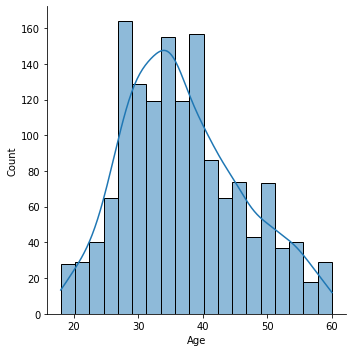

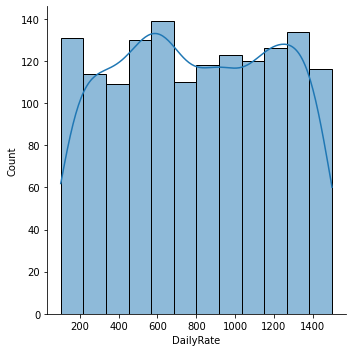

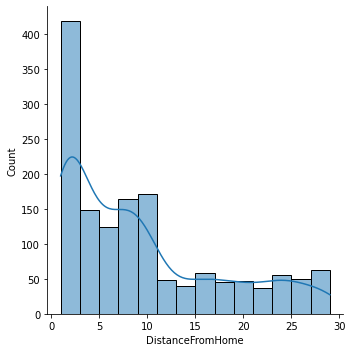

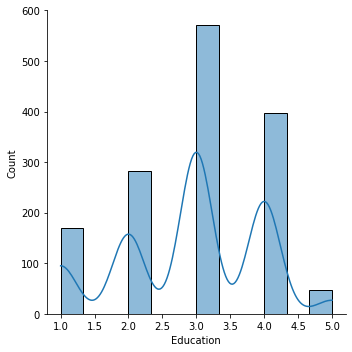

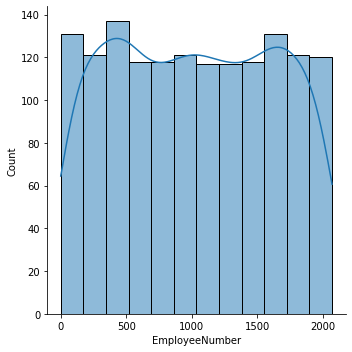

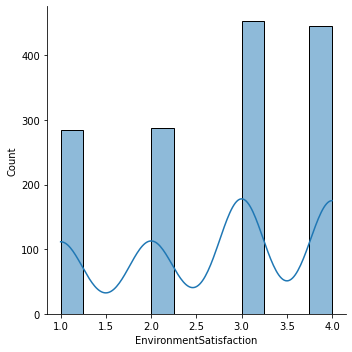

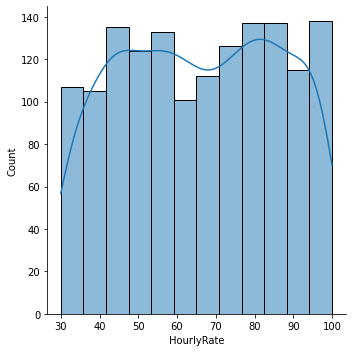

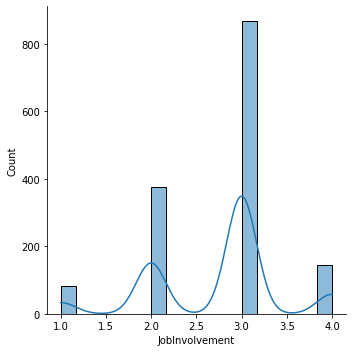

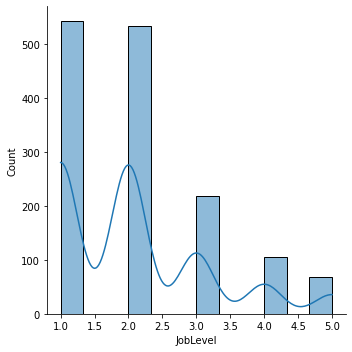

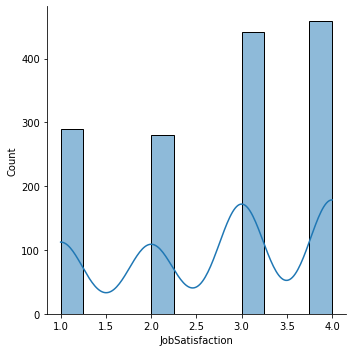

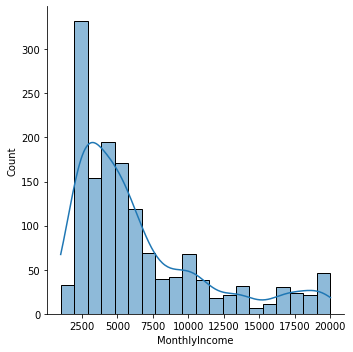

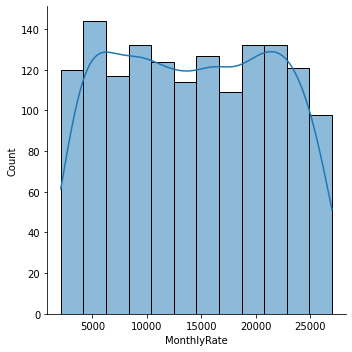

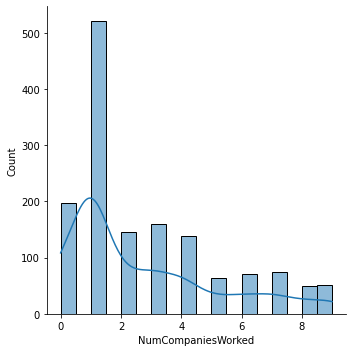

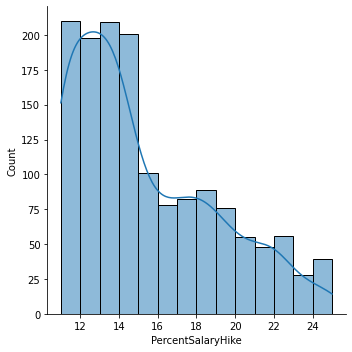

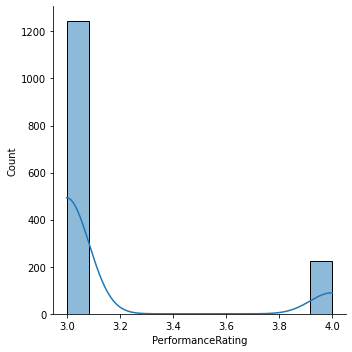

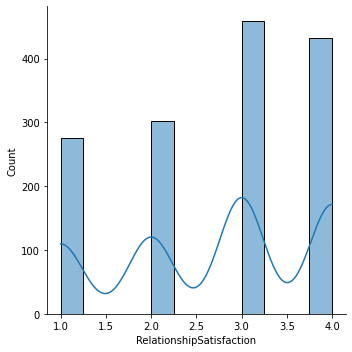

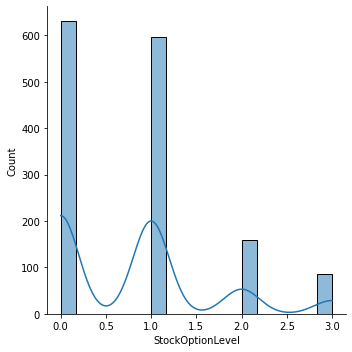

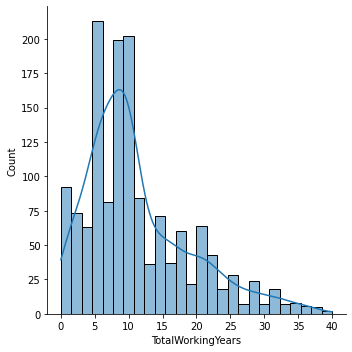

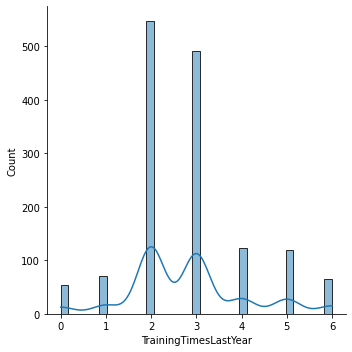

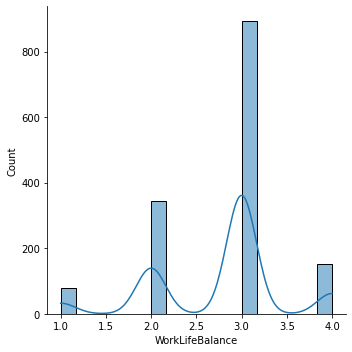

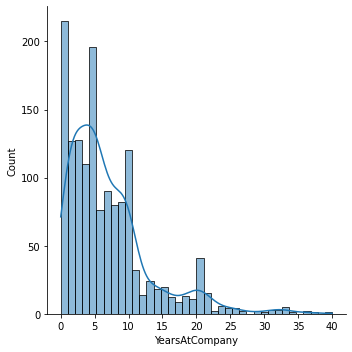

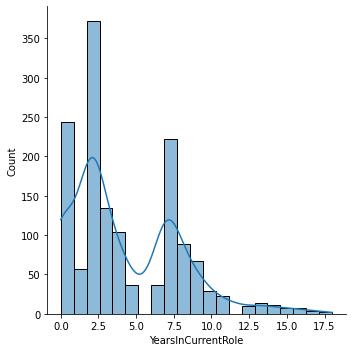

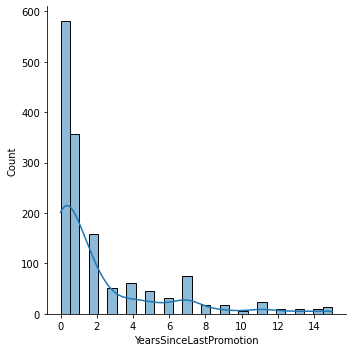

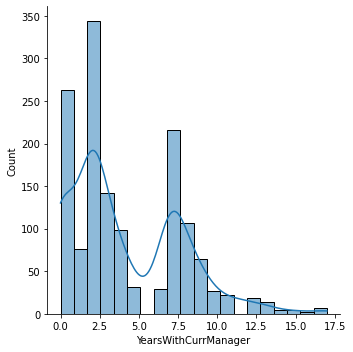

In [15]:
for col in numerical_columns:
    sns.displot(df[col], kde=True)
    plt.show()

In [64]:
fig = px.histogram(df, x='BusinessTravel', color='Attrition', opacity=0.8,
                   title='Attrition portion by Business Travel frequency',
                   color_discrete_map={'Yes':'limegreen', 'No':'tomato'})
fig.show()

It can be noticed that the proportion of attrited employees is less if they had Business Travel frequently.

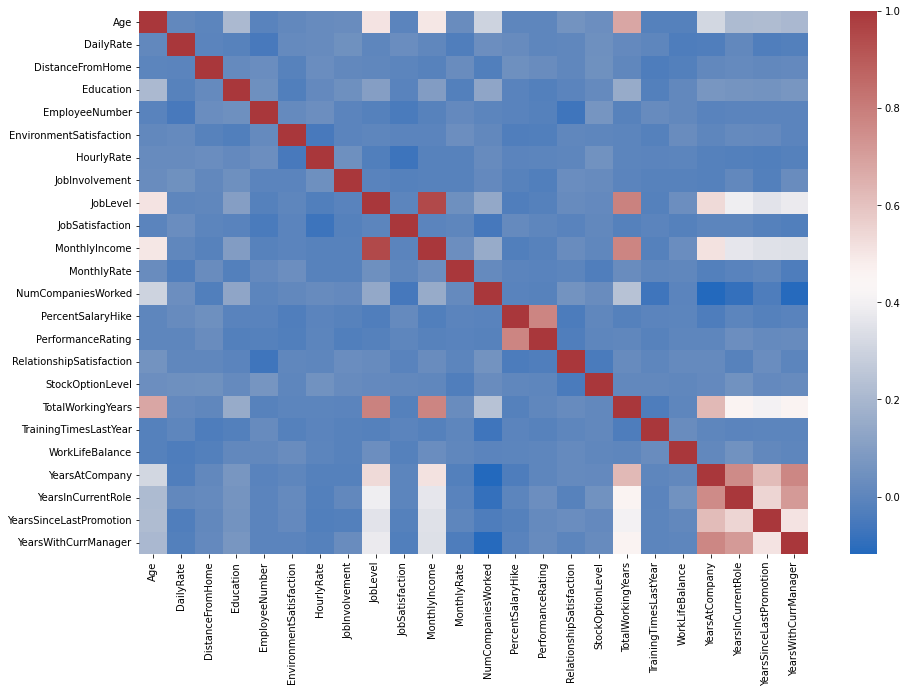

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='vlag')
plt.show()

From heatmap we can find out correlated features in data: lighter the cell higher the correlation between features.

In [50]:
fig = px.pie(values=df['Department'].value_counts().values, names=df['Department'].value_counts().index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Pie chart tells us that more than half of employees work in Research & Development department.

In [52]:
fig = px.box(df, y='MonthlyIncome', color='JobRole',
             title='Income comparison by job role', color_discrete_sequence=px.colors.sequential.Plotly3)
fig.show()

Here we can see that Managers have the highest salaries, and Sales Representatives the lowest salaries in average.

In [53]:
fig = px.histogram(df, x='JobSatisfaction', color='Gender', opacity=0.8,
                   title='Job satisfication by gender',
                   color_discrete_map={'Female':'mediumorchid', 'Male':'dodgerblue'})
fig.update_layout(bargap=0.2)
fig.show()

In [21]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

From the histogram we can conclude that men are more satisfied by their job (may be because data contain more information about men).

In [56]:
fig = px.scatter(df, x='Age', y='MonthlyIncome', title='Dependency of monthly income from employee age')
fig.show()

We can see that the trend between age and income is increasing (older employess get higher salaries).

In [62]:
fig = px.histogram(df, x='YearsAtCompany', color='StockOptionLevel',
                   title='Stock option level by years at company',
                   color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Logically employees with more experience in that company has to have higher level of stock option, but we can't surely conclude the same from the plot.

In [65]:
fig = px.histogram(df, x='RelationshipSatisfaction', color='Attrition',
                   title='Attrition portion by relationship satisfaction',
                   color_discrete_map={'Yes':'limegreen', 'No':'tomato'})
fig.update_layout(bargap=0.2)
fig.show()

We can see that relationship satisfaction doen's affect much to employee attrition.

In [66]:
fig = px.histogram(df, x='JobLevel', color='Education',
                   title='Job level by education', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(bargap=0.2)
fig.show()

High job level employeesare mostly the employees who has studied 3 years (may be this refers to highest education)

In [71]:
fig = px.scatter(df, x='TotalWorkingYears', y='MonthlyIncome', color='Department', size='MonthlyIncome',
                 title='Dependency between monthly income and total working years',
                 color_discrete_map={'Sales': 'coral',
                                     'Research & Development': 'darkcyan',
                                     'Human Resources': 'greenyellow'})
fig.show()

As expected employees with longer experience get much more salaries than the employees with shorter experience.